In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/root/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


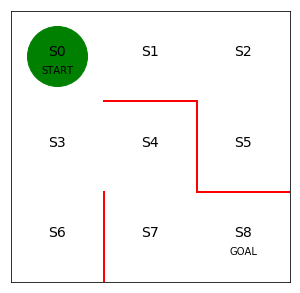

In [16]:
# initialize
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# draw red walls
plt.plot([1, 1], [0, 1], color="red", linewidth=2)
plt.plot([1, 2], [2, 2], color="red", linewidth=2)
plt.plot([2, 2], [2, 1], color="red", linewidth=2)
plt.plot([2, 3], [1, 1], color="red", linewidth=2)

# draw S0 ~ S8
plt.text(0.5, 2.5, "S0", size=14, ha="center")
plt.text(1.5, 2.5, "S1", size=14, ha="center")
plt.text(2.5, 2.5, "S2", size=14, ha="center")
plt.text(0.5, 1.5, "S3", size=14, ha="center")
plt.text(1.5, 1.5, "S4", size=14, ha="center")
plt.text(2.5, 1.5, "S5", size=14, ha="center")
plt.text(0.5, 0.5, "S6", size=14, ha="center")
plt.text(1.5, 0.5, "S7", size=14, ha="center")
plt.text(2.5, 0.5, "S8", size=14, ha="center")
plt.text(0.5, 2.3, "START", ha="center")
plt.text(2.5, 0.3, "GOAL", ha="center")

# set drawing range and banish axis
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", right="off", left="off", labelleft="off")

# draw green circle at current position
line, = ax.plot([0.5], [2.5], marker="o", color="g", markersize=60)

In [5]:
# set parameter "theta_0"

theta_0 = np.array([[np.nan, 1, 1, np.nan], # S0
                    [np.nan, 1, np.nan, 1], # S1
                    [np.nan, np.nan, 1, 1], # S2
                    [1, 1, 1, np.nan], # S3
                    [np.nan, np.nan, 1, 1], # S4
                    [1, np.nan, np.nan, np.nan], # S5
                    [1, np.nan, np.nan, np.nan], # S6
                    [1, 1, np.nan, np.nan], # S8
                    ])

In [ ]:
# define transfer function

def simple_convert_into_pi_from_theta(theta):
    # simply caluculate proposition
    
    [m, n] = theta.shape # obtain the size of theta
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        
    pi = np.nan_to_num(pi)
        
    return pi

In [ ]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [ ]:
pi_0

In [ ]:
# define function to get state after 1 step

def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    
    next_direction = np.random.choice(direction, p=pi[s, :])
    # direction is chosen according to pi[s, :]
    
    if next_direction == "up":
        s_next = s - 3
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 3
    elif next_direction == "left":
        s_next = s - 1
    
    return s_next

In [ ]:
# define function to move the agent to goal

def goal_maze(pi):
    s = 0 # start position
    state_history = [0]
    
    while True:
        next_s = get_next_s(pi, s)
        state_history.append(next_s)
        
        if next_s == 8:
            break
        else:
            s = next_s
    return state_history

In [ ]:
state_history = goal_maze(pi_0)

In [ ]:
state_history

In [ ]:
from matplotlib import animation
from IPython.display import HTML

def init():
    # initialize background image
    line.set_data([], [])
    return (line,)

def animate(i):
    state = state_history[i]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

In [ ]:
def softmax_convert_into_pi_from_theta(theta):
    beta = 1.0
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    
    exp_theta = np.exp(beta * theta)
    
    for i in range(0, m):
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        
    pi = np.nan_to_num(pi)
    
    return pi

In [ ]:
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

In [ ]:
def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction == "up":
        action = 0
        s_next = s - 3
    elif next_direction == "right":
        action = 1
        s_next = s + 1
    elif next_direction == "down":
        action = 2
        s_next = s + 3
    elif next_direction == "left":
        action = 3
        s_next = s - 1
    
    return [action, s_next]

In [ ]:
def goal_maze_ret_s_a(pi):
    s = 0
    s_a_history = [[0, np.nan]]
    
    while True:
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        
        s_a_history.append([next_s, np.nan])
        
        if next_s == 8:
            break
        else:
            s = next_s
    
    return s_a_history

In [ ]:
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)

In [ ]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1
    T = len(s_a_history) - 1
    
    [m, n] = theta.shape
    delta_theta = theta.copy()
    
    for i in range(0, m):
        for j in range(0, n):
            if not (np.isnan(theta[i, j])):
                
                SA_i = [SA for SA in s_a_history if SA[0] == i]
                
                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                
                N_i = len(SA_i)
                N_ij = len(SA_ij)
                delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
    
    new_theta = theta + eta * delta_theta
    
    return new_theta

In [ ]:
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

In [ ]:
# solution with Policy Gradient Metohd

stop_epsilon = 10 ** -8

theta = theta_0
pi = pi_0

is_continue = True

while is_continue:
    s_a_history = goal_maze_ret_s_a(pi)
    new_theta = update_theta(theta, pi, s_a_history)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)
    
    print(np.sum(np.abs(new_pi - pi)))
    print(str(len(s_a_history) - 1) + "step")

    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

In [ ]:
np.set_printoptions(precision=3, suppress=True)
print(pi)

In [ ]:
from matplotlib import animation
from IPython.display import HTML

def init():
    # initialize background image
    line.set_data([], [])
    return (line,)

def animate(i):
    state = s_a_history[i][0]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

## Sarsa imprementation

In [6]:
# setting Q-function

[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0

In [9]:
def simple_convert_into_pi_from_theta(theta):
    
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
    
    pi = np.nan_to_num(pi)
    
    return pi

pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [11]:
# epsilon-greedy

def get_action(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    
    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]
    
    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3
    
    return action

def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a]
    
    if next_direction == "up":
        s_next = s - 3
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 3
    elif next_direction == "left":
        s_next = s - 1
    
    return s_next

In [9]:
# update Q-function with Sarsa

def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):
    
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])
    
    return Q

In [15]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]
    
    while True:
        a = a_next
        
        s_a_history[-1][1] = a
        
        s_next = get_s_next(s, a, Q, epsilon, pi)
        
        s_a_history.append([s_next, np.nan])
        
        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
        
        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)
        
        if s_next == 8:
            break
        else:
            s = s_next
        
    return [s_a_history, Q]

In [19]:
# solution with Sarsa

eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1

while is_continue:
    print("episode:" + str(episode))
    
    epsilon = epsilon / 2
    
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    
    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v - v)))
    v = new_v
    
    print(str(len(s_a_history) - 1) + "step")
    
    episode = episode + 1
    if episode > 100:
          break

episode:1
0.09366553366
8step
episode:2
4.78883599442e-12
4step
episode:3
4.35218527883e-12
4step
episode:4
3.95528054753e-12
4step
episode:5
3.59445806453e-12
4step
episode:6
3.26638716075e-12
4step
episode:7
2.96807023403e-12
4step
episode:8
2.69706479372e-12
4step
episode:9
2.45059528226e-12
4step
episode:10
2.22677432049e-12
4step
episode:11
2.02304839547e-12
4step
episode:12
1.83819626187e-12
4step
episode:13
1.67010849594e-12
4step
episode:14
1.51734180776e-12
4step
episode:15
1.37845290737e-12
4step
episode:16
1.25233157178e-12
4step
episode:17
1.13753451103e-12
4step
episode:18
1.03339559132e-12
4step
episode:19
9.38582545018e-13
4step
episode:20
8.52651282912e-13
4step
episode:21
7.74380559676e-13
4step
episode:22
7.03437308402e-13
4step
episode:23
6.38933350672e-13
4step
episode:24
5.80313574972e-13
4step
episode:25
5.2702286979e-13
4step
episode:26
4.78728168218e-13
4step
episode:27
4.34763336443e-13
4step
episode:28
3.94906329859e-13
4step
episode:29
3.58379992349e-13
4step

## Q-learning implementation

In [3]:
def Q_learning(s, a, r, s_next, Q, eta, gamma):
    
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next, :]) - Q[s, a])
    
    return Q

In [6]:
[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0 * 0.1

In [7]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]
    
    while True:
        a = a_next
        
        s_a_history[-1][1] = a
        
        s_next = get_s_next(s, a, Q, epsilon, pi)
        
        s_a_history.append([s_next, np.nan])
        
        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
        
        Q = Q_learning(s, a, r, s_next, Q, eta, gamma)
        
        if s_next == 8:
            break
        else:
            s = s_next
        
    return [s_a_history, Q]

In [12]:
# solution with Q-learning

eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1

V = []
V.append(np.nanmax(Q, axis=1))

while is_continue:
    print("episode:" + str(episode))
    
    epsilon = epsilon / 2
    
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    
    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v - v)))
    v = new_v
    V.append(v)
    
    print(str(len(s_a_history) - 1) + "step")
    
    episode = episode + 1
    if episode > 100:
        break

episode:1
0.113391839613
44step
episode:2
0.209823122017
240step
episode:3
0.114103686797
98step
episode:4
0.09519770946
12step
episode:5
0.0925230468358
8step
episode:6
0.0908728520438
6step
episode:7
0.0890045461134
4step
episode:8
0.088102815332
4step
episode:9
0.0871644054355
4step
episode:10
0.0861767198917
4step
episode:11
0.0851291079969
4step
episode:12
0.0840130792258
4step
episode:13
0.0828223691456
4step
episode:14
0.0815528968852
4step
episode:15
0.0802026460044
4step
episode:16
0.0787714939026
4step
episode:17
0.0772610093887
4step
episode:18
0.0756742335349
4step
episode:19
0.0740154552734
4step
episode:20
0.0722899902324
4step
episode:21
0.0705039689357
4step
episode:22
0.0686641385942
4step
episode:23
0.0667776812243
4step
episode:24
0.0648520496648
4step
episode:25
0.062894822165
4step
episode:26
0.0609135755416
4step
episode:27
0.0589157763992
4step
episode:28
0.0569086895528
4step
episode:29
0.054899302547
4step
episode:30
0.0528942650098
4step
episode:31
0.050899841

In [17]:
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    line, = ax.plot([0.5], [2.5], marker="s", color=cm.jet(V[i][0]), markersize=85)
    line, = ax.plot([1.5], [2.5], marker="s", color=cm.jet(V[i][1]), markersize=85)
    line, = ax.plot([2.5], [2.5], marker="s", color=cm.jet(V[i][2]), markersize=85)
    line, = ax.plot([0.5], [1.5], marker="s", color=cm.jet(V[i][3]), markersize=85)
    line, = ax.plot([1.5], [1.5], marker="s", color=cm.jet(V[i][4]), markersize=85)
    line, = ax.plot([2.5], [1.5], marker="s", color=cm.jet(V[i][5]), markersize=85)
    line, = ax.plot([0.5], [0.5], marker="s", color=cm.jet(V[i][6]), markersize=85)
    line, = ax.plot([1.5], [0.5], marker="s", color=cm.jet(V[i][7]), markersize=85)
    line, = ax.plot([2.5], [0.5], marker="s", color=cm.jet(1.0), markersize=85)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(V), interval=200, repeat=False)
HTML(anim.to_jshtml())